# Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\14 Random Forest\glass.csv')

In [3]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [4]:
data.shape

(999, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
## missing values
data.isnull().sum()

RI      785
Na      785
Mg      785
Al      785
Si      785
K       785
Ca      785
Ba      785
Fe      785
Type    785
dtype: int64

In [8]:
## there is no data from row 215 to 999 hence we can drop the null rows

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [11]:
data.shape

(214, 10)

In [12]:
## Duplicate rows
data.duplicated().any()

True

In [13]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1.0


In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.duplicated().any()

False

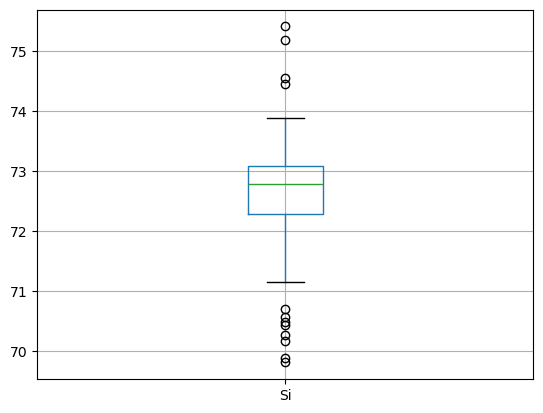

In [16]:
data.boxplot('Si')
plt.show();

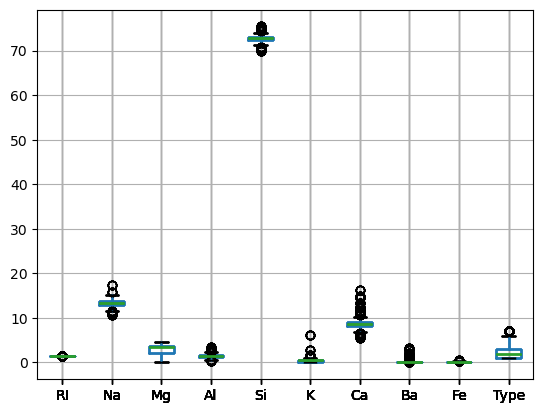

In [17]:
for i in data.columns:
    data.boxplot()
plt.show();

In [18]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [19]:
## Almost every column has outliers. We will use z-score to remove the outliers

In [20]:
import scipy.stats as stats

In [21]:
def outlier_remove(data,columns):
    threshold=2
    z_score=stats.zscore(data[columns])
    return data[(abs(z_score)<threshold).all(axis=1)]

In [22]:
df=outlier_remove(data,['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'])

In [23]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0,6.0
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0,6.0
181,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.0,6.0
182,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.0,0.0,6.0


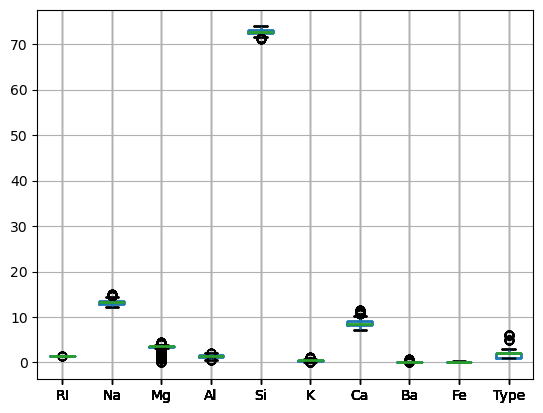

In [24]:
for i in df.columns:
    df.boxplot()
plt.show();

In [25]:
## our new dataset df is now clean

### Data Visualization

In [26]:
import warnings
warnings.filterwarnings('ignore')

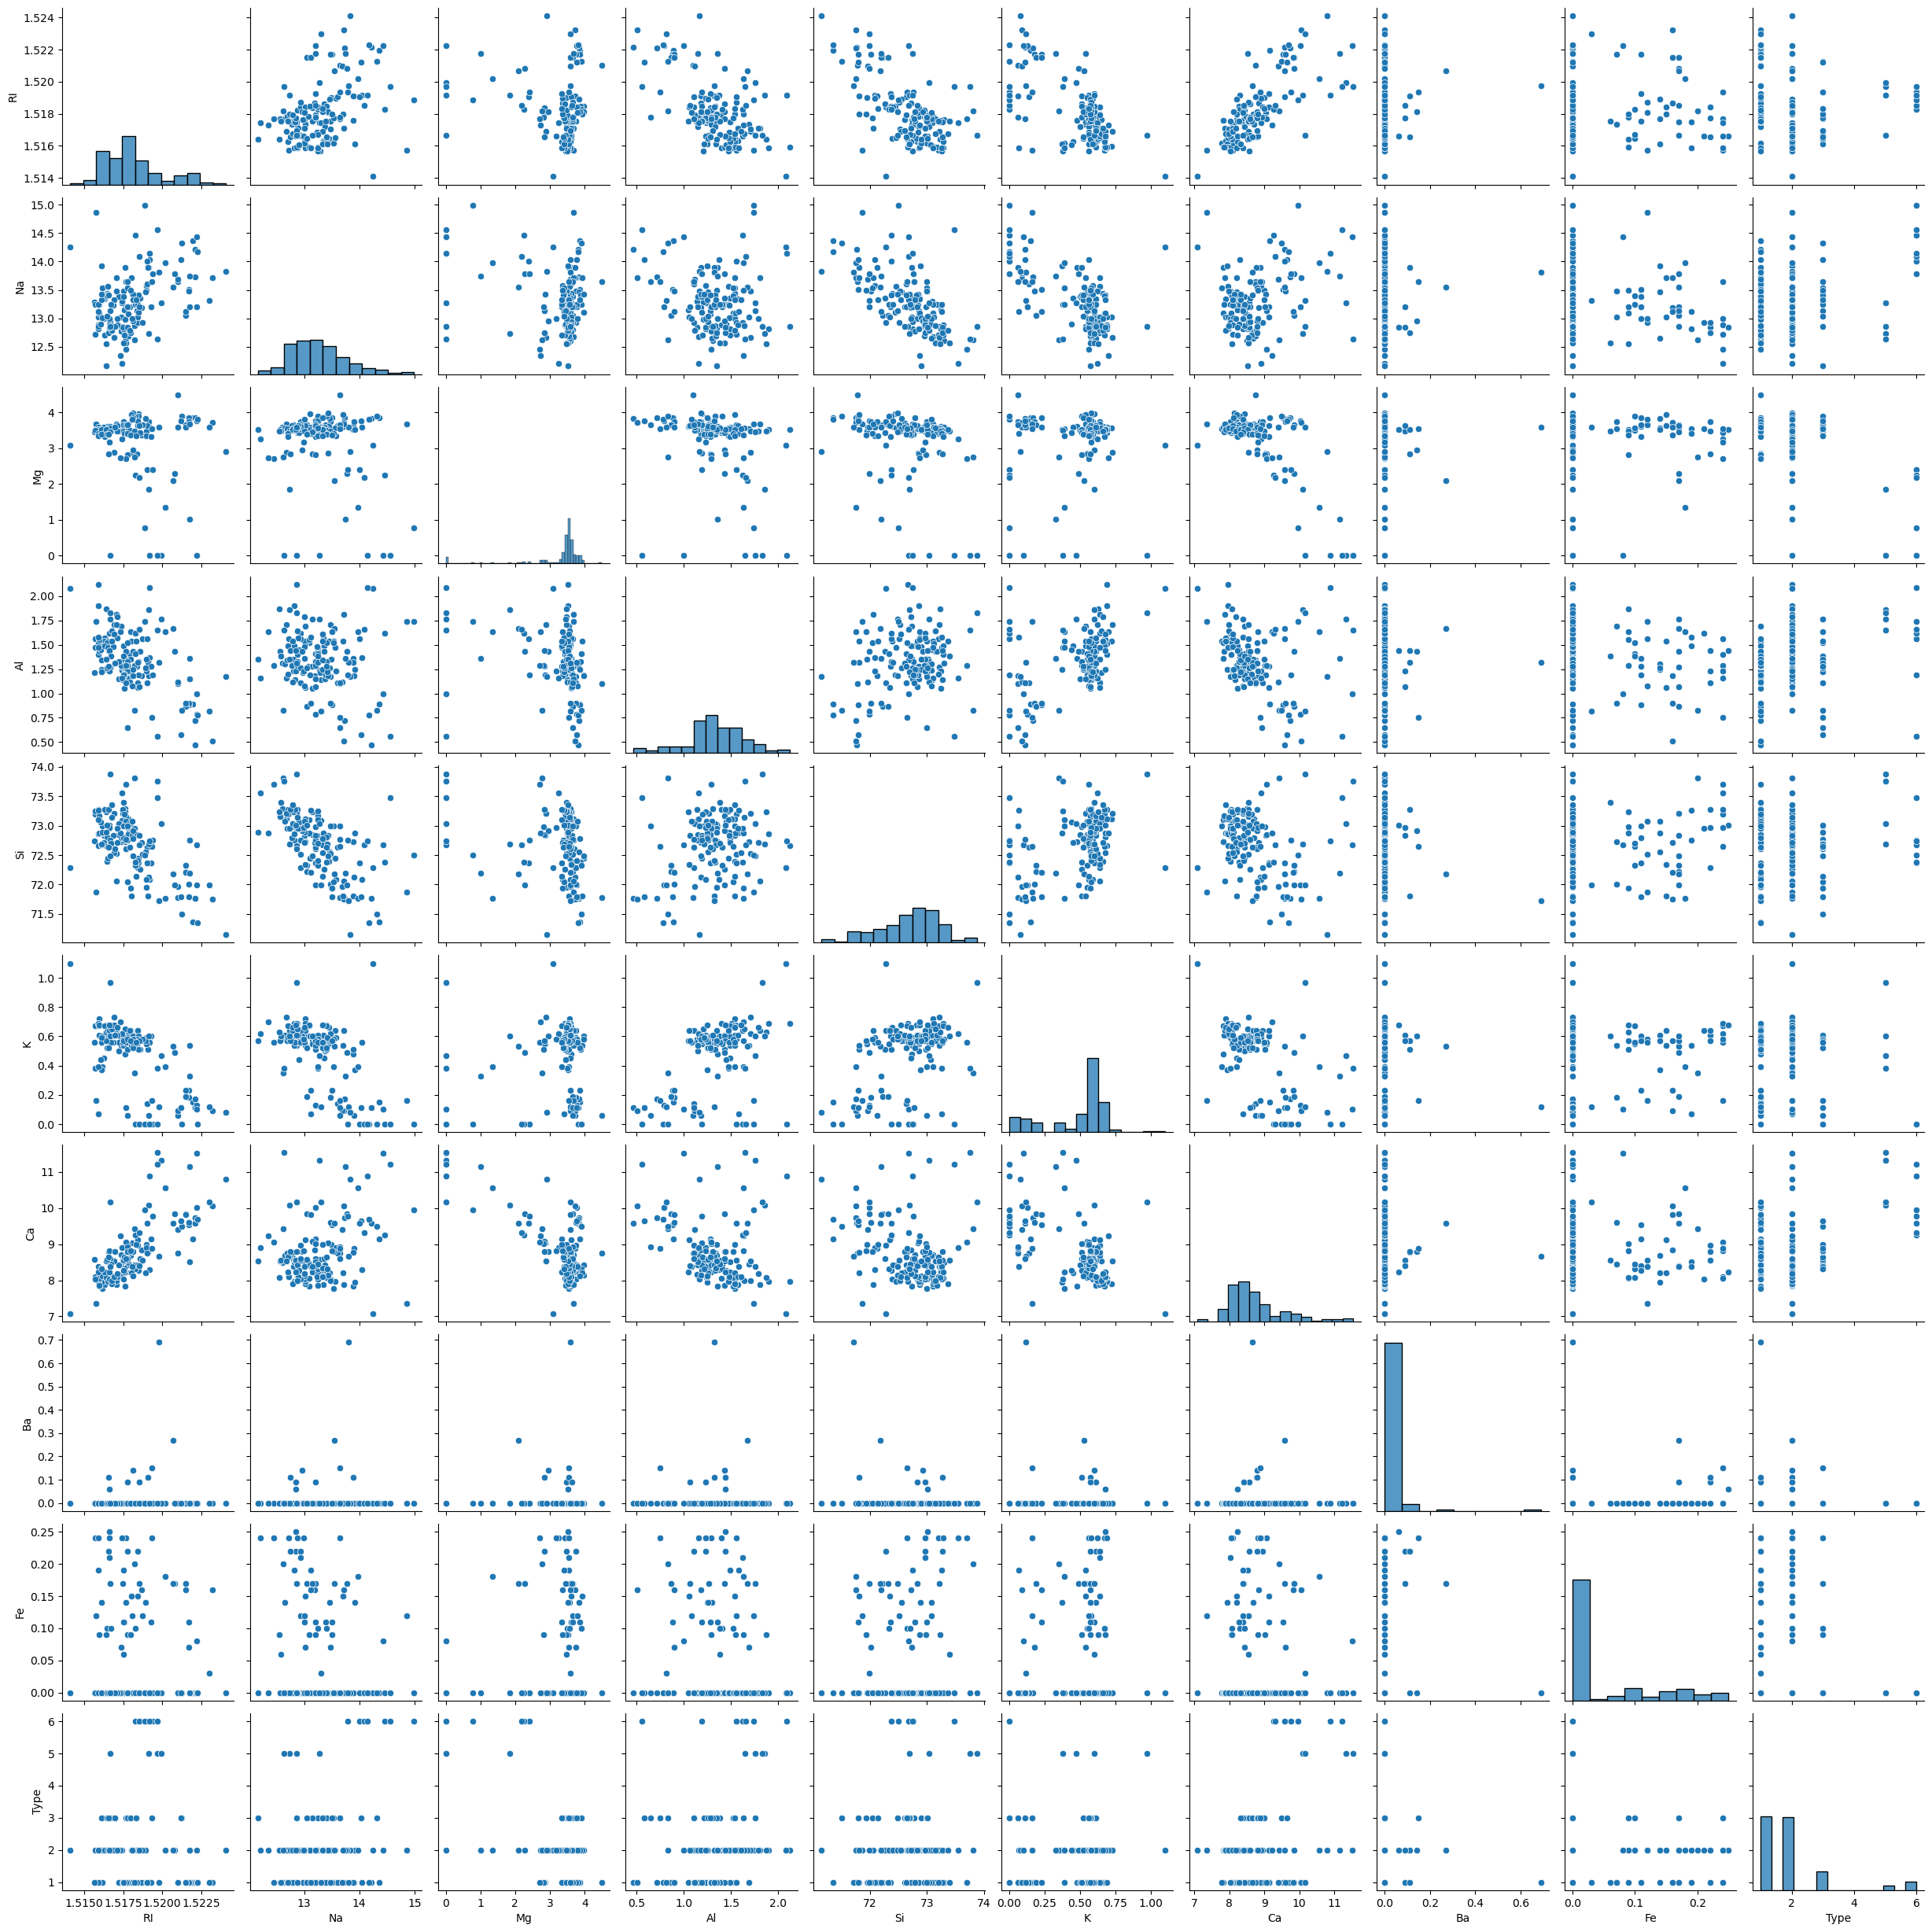

In [27]:
sns.pairplot(df)
plt.show();

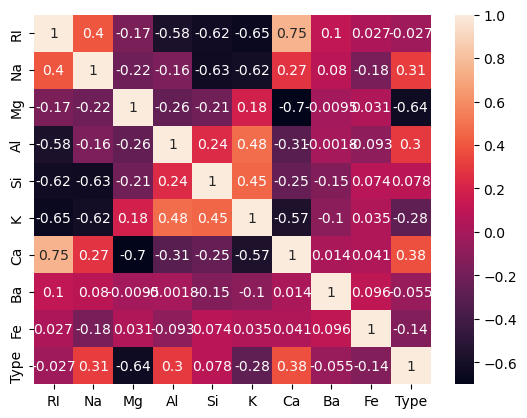

In [28]:
sns.heatmap(df.corr(),annot=True)
plt.show();

In [29]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,0.395388,-0.168587,-0.580847,-0.623529,-0.653912,0.750268,0.103265,0.026601,-0.027333
Na,0.395388,1.000000,-0.220940,-0.161546,-0.634181,-0.620972,0.271583,0.080080,-0.180804,0.312082
Mg,-0.168587,-0.220940,1.000000,-0.264867,-0.205682,0.182926,-0.701257,-0.009532,0.030854,-0.636565
Al,-0.580847,-0.161546,-0.264867,1.000000,0.240474,0.478104,-0.311283,-0.001777,-0.093384,0.301711
Si,-0.623529,-0.634181,-0.205682,0.240474,1.000000,0.451352,-0.251112,-0.145873,0.073839,0.077605
K,-0.653912,-0.620972,0.182926,0.478104,0.451352,1.000000,-0.570098,-0.101905,0.035168,-0.277910
Ca,0.750268,0.271583,-0.701257,-0.311283,-0.251112,-0.570098,1.000000,0.013545,0.040614,0.375439
Ba,0.103265,0.080080,-0.009532,-0.001777,-0.145873,-0.101905,0.013545,1.000000,0.096303,-0.054991
Fe,0.026601,-0.180804,0.030854,-0.093384,0.073839,0.035168,0.040614,0.096303,1.000000,-0.139164
Type,-0.027333,0.312082,-0.636565,0.301711,0.077605,-0.277910,0.375439,-0.054991,-0.139164,1.000000


In [30]:
## Some of the features do share moderate correlation however majority have low or negative correlation

### Data Preprocessing

In [31]:
## missing values, duplicate rows and outliers have already been cleared

In [32]:
## There is no categorical columns

In [33]:
## our target column is Type, so we will check all the classes in target
df['Type'].unique()

array([1., 2., 3., 5., 6.])

In [34]:
df['Type'].value_counts()

Type
1.0    64
2.0    63
3.0    16
6.0     7
5.0     4
Name: count, dtype: int64

In [35]:
target=df[['Type']]
features1=df.drop('Type',axis=1)

In [36]:
target

,Type
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
178,6.0
179,6.0
181,6.0
182,6.0


In [37]:
features1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0
...,...,...,...,...,...,...,...,...,...
178,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.0,0.0
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.0,0.0
181,1.51888,14.99,0.78,1.74,72.50,0.00,9.95,0.0,0.0
182,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.0,0.0


In [38]:
## Since we checked imbalance in target column we will apply Random Over Sampler

In [39]:
from imblearn.over_sampling import RandomOverSampler

In [40]:
over_sam=RandomOverSampler()

In [41]:
features1,target=over_sam.fit_resample(features1,target)

In [42]:
target.value_counts()

Type
1.0     64
2.0     64
3.0     64
5.0     64
6.0     64
Name: count, dtype: int64

In [43]:
## we will perform normalization of the features

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
min_max=MinMaxScaler()

In [46]:
features=pd.DataFrame(min_max.fit_transform(features1),columns=features1.columns)

In [47]:
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.691309,0.522968,1.000000,0.381818,0.230769,0.054545,0.375281,0.0,0.0
1,0.351648,0.611307,0.801782,0.539394,0.578755,0.436364,0.168539,0.0,0.0
2,0.208791,0.484099,0.790646,0.648485,0.673993,0.354545,0.157303,0.0,0.0
3,0.356643,0.371025,0.821826,0.496970,0.534799,0.518182,0.256180,0.0,0.0
4,0.332667,0.392226,0.806236,0.466667,0.706960,0.500000,0.222472,0.0,0.0
...,...,...,...,...,...,...,...,...,...
315,0.559441,0.848057,0.000000,0.054545,0.853480,0.000000,0.930337,0.0,0.0
316,0.478521,1.000000,0.173719,0.769697,0.494505,0.000000,0.644944,0.0,0.0
317,0.559441,0.848057,0.000000,0.054545,0.853480,0.000000,0.930337,0.0,0.0
318,0.478521,1.000000,0.173719,0.769697,0.494505,0.000000,0.644944,0.0,0.0


### Random Forest Model Implementation

In [48]:
## import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
## define random forest with default hyperparameters
random_forest=RandomForestClassifier(n_estimators=200,max_features='sqrt',max_samples=1.0,bootstrap=True,random_state=100)

In [50]:
## import train test split and grid search
from sklearn.model_selection import train_test_split,GridSearchCV

In [108]:
## split training and testing data
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [109]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(256, 9)
(64, 9)
(256, 1)
(64, 1)


In [110]:
## build model
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_samples=1.0, random_state=200)

In [111]:
## predict target values for testing data
y_pred=random_forest.predict(x_test)

In [112]:
## import validation metrics
from sklearn.metrics import accuracy_score,classification_report

In [113]:
accuracy_score(y_test,y_pred)

0.90625

In [114]:
## Accuracy is 91%. we will check with different values of hyperparameters

In [115]:
random_forest=RandomForestClassifier(n_estimators=100,max_features='sqrt',max_samples=1.0,bootstrap=True,random_state=200)

In [116]:
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_samples=1.0, random_state=200)

In [117]:
y_pred=random_forest.predict(x_test)

In [118]:
accuracy_score(y_test,y_pred)

0.90625

In [119]:
## Accuracy still 91%

In [120]:
random_forest1=RandomForestClassifier(n_estimators=150,max_features='sqrt',max_samples=1.0,bootstrap=True,random_state=500)

In [121]:
random_forest1.fit(x_train,y_train)

RandomForestClassifier(max_samples=1.0, n_estimators=150, random_state=500)

In [122]:
y_pred1=random_forest1.predict(x_test)

In [123]:
accuracy_score(y_test,y_pred1)

0.90625

In [124]:
## we see that the maximum accuracy is 91% using n_estimators=100 and random_state=200 so we choose this model

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.91      0.91      0.91        11
         2.0       0.89      0.62      0.73        13
         3.0       0.78      1.00      0.88        14
         5.0       1.00      1.00      1.00        15
         6.0       1.00      1.00      1.00        11

    accuracy                           0.91        64
   macro avg       0.92      0.90      0.90        64
weighted avg       0.91      0.91      0.90        64



### Bagging and Boosting Methods

#### Bagging Classifier

In [126]:
## import bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [127]:
## define bagging classifier using default hyperparameters
bag_class=BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=3),n_estimators=50,max_features=1.0,max_samples=1.0,bootstrap=True)

In [128]:
## model building
bag_class.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=3,
                                                   splitter='random'),
                  n_estimators=50)

In [129]:
## predict target values for testing data
y_pred_bag=bag_class.predict(x_test)

In [130]:
accuracy_score(y_test,y_pred_bag)

0.875

In [131]:
dec_tree=DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=3)

In [132]:
bag_class=BaggingClassifier(estimator=dec_tree,n_estimators=100,max_features=1.0,max_samples=1.0,bootstrap=True,random_state=200)

In [133]:
## model building
bag_class.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=3,
                                                   splitter='random'),
                  n_estimators=100, random_state=200)

In [134]:
## predict target values for testing data
y_pred_bag=bag_class.predict(x_test)

In [135]:
accuracy_score(y_test,y_pred_bag)

0.84375

In [136]:
## Maximum accuracy using bagging classifier is 83%, hence random forest is preferred over bagging in this case

#### Boosting methods

In [137]:
## we will try using AdaBoost, Gradient Boost, and XG Boost

In [138]:
## Adaboost
from sklearn.ensemble import AdaBoostClassifier

In [139]:
## define Adaboost classifier with hyperparameters
ada_boost=AdaBoostClassifier(estimator=dec_tree,n_estimators=100,random_state=200)

In [140]:
## build model
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=3,
                                                    splitter='random'),
                   n_estimators=100, random_state=200)

In [141]:
y_pred_ada=ada_boost.predict(x_test)

In [142]:
accuracy_score(y_test,y_pred_ada)

0.890625

In [143]:
## accuracy using Adaboost is 89% 

In [144]:
## Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

In [145]:
grad_boost=GradientBoostingClassifier(n_estimators=100,learning_rate=0.5,max_features=1.0,subsample=1.0,random_state=200)

In [146]:
grad_boost.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_features=1.0,
                           random_state=200)

In [147]:
y_pred_grad=grad_boost.predict(x_test)

In [148]:
accuracy_score(y_test,y_pred_grad)

0.90625

In [149]:
print(classification_report(y_test,y_pred_grad))

              precision    recall  f1-score   support

         1.0       0.69      1.00      0.81        11
         2.0       1.00      0.54      0.70        13
         3.0       0.93      1.00      0.97        14
         5.0       1.00      1.00      1.00        15
         6.0       1.00      1.00      1.00        11

    accuracy                           0.91        64
   macro avg       0.92      0.91      0.90        64
weighted avg       0.93      0.91      0.90        64



In [150]:
## we see that the model accuracy is 91% using gradient boost

In [151]:
## XG Boost

In [152]:
!pip install Xgboost

In [153]:
import xgboost as xgb

In [154]:
xgb=xgb.XGBClassifier(n_estimator=100,learning_rate=0.5,gamma=0,reg_lambda=1,min_child_weight=1)

In [155]:
## before model building we need to use label encoder to target column

In [156]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
y_train=lab_enc.fit_transform(y_train)
y_test=lab_enc.fit_transform(y_test)

In [157]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=100, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [158]:
y_pred_xg=xgb.predict(x_test)

In [159]:
accuracy_score(y_test,y_pred_xg)

0.953125

In [165]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.92      0.85      0.88        13
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        11

    accuracy                           0.95        64
   macro avg       0.95      0.95      0.95        64
weighted avg       0.95      0.95      0.95        64



In [166]:
## with default parameters in XG boost model accuracy is 95%, hence we can conclude that best accuracy is achieved using XG boost
## F1 score for class 0,1,2,3,4 are 91%, 88%, 97%, 100% and 100% respectively

In [167]:
## Training validation

In [168]:
y_pred_xg_train=xgb.predict(x_train)

In [169]:
accuracy_score(y_train,y_pred_xg_train)

1.0

In [170]:
print(classification_report(y_train,y_pred_xg_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        51
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        49
           4       1.00      1.00      1.00        53

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



In [171]:
## training validation is 100%

### Additional Notes

In [172]:
## 1. Explain Bagging and Boosting methods. How is it different from each other.

In [173]:
## Bagging: It is a homogeneous weak learners’ model that learns from each other independently in parallel and combines them for determining the model average.
## Boosting: It is also a homogeneous weak learners’ model but works differently from Bagging. In this model, learners learn sequentially and adaptively to improve model predictions of a learning algorithm.
## The bagging technique combines multiple models trained on different subsets of data, whereas boosting trains the model sequentially, focusing on the error made by the previous model.
## Bagging is used when the model is overfit. It uses one algorithm multiple times but the training data shuffles everytime.
## Boosting is used when the model is underfit.

In [174]:
## 2. Explain how to handle imbalance in the data.

In [175]:
## suppose we have two classes in our target column, 0 and 1, in a dataset containing 100 rows. If class 1 appears in 90 rows while class 0 appears
## in only 10 rows, we say that this is an imbalance dataset. Algorithms may get biased towards the majority class and thus tend to predict output
## as the majority class. Imbalanced dataset gives misleading accuracy score.
## Imbalanced dataset can be handled using two approach
## 1. Using diffetent evaluation metric - checking F1 score instead of accuracy is a better approach as this is a mean os recall and accuracy. Recall
## is ability os classifier to cerrectly identify a class.
## 2. Resampling (Undersampling and Oversampling) - This method involves adjusting the balance between minority and majority classes through upsampling.
## In the case of an imbalanced dataset, oversampling the minority class with replacement, termed oversampling, is employed. Conversely, undersampling
## entails randomly removing rows from the majority class to align with the minority class. This sampling approach yields a balanced dataset, ensuring
## comparable representation for both majority and minority classes. Achieving a similar number of records for both classes in the dataset signifies
## that the classifier will assign equal importance to each class during training.